<a href="https://colab.research.google.com/github/xuxiufeng/Blockchain_Simulation_Multiple_Hackers_with_Resetting_Times/blob/main/Gamma_Weibull_Gamma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

In [2]:
np.random.seed(1)

In [3]:
k = 7

Generate $\eta_j$ and $\delta_j$, where $j=1,2,3,4$.

In [42]:
eta_list = np.random.uniform(0,1/2,k)
delta_list = np.random.uniform(0,1/3,k)
eta_list, delta_list

(array([0.05602804, 0.19180913, 0.33525868, 0.12924085, 0.25692128,
        0.48631835, 0.21389227]),
 array([0.14771162, 0.29783982, 0.18411726, 0.06560715, 0.1094761 ,
        0.25086106, 0.25529657]))

For $X\sim Gamma(\eta_j, \delta_j)$, we have
\begin{eqnarray*}
f(x)=\frac{\delta_j^{\eta_j}}{\Gamma(\eta_j)}x^{\eta_j-1}e^{-\delta_j x}
\end{eqnarray*}

In [46]:
def ET_m(m, eta_list, delta_list, alpha, beta, theta, tau):
    def Generate_Z(m, eta_list, delta_list):
        sum_of_x_list = []
        for i in range(len(eta_list)):
            sum_of_x_list.append(np.sum(np.random.gamma(eta_list[i], 1/delta_list[i], m)))
        Z = min(sum_of_x_list)
        return Z
    def T_m(m, eta_list, delta_list, alpha, beta, theta, tau):
        sum_of_time = 0
        sum_of_w = 0
        y = weibull_min.rvs(c=beta, scale=alpha)
        w = np.random.gamma(theta, 1/tau)
        Z_m = Generate_Z(m, eta_list, delta_list)
        while Z_m > y:
            sum_of_time = sum_of_time + y + w
            sum_of_w += w
            Z_m = Generate_Z(m, eta_list, delta_list)
            y = weibull_min.rvs(c=beta, scale=alpha)
            w = np.random.gamma(theta, 1/tau)
        return sum_of_time + Z_m, sum_of_w

    ET = np.repeat(np.nan, m)
    sum_w = np.repeat(np.nan, m)
    for i in range(m):
        T_0 = 0
        W_0 = 0
        iter = 10000 # iter 30000
        for j in range(iter):
            T_0 += T_m(i+1, eta_list, delta_list, alpha, beta, theta, tau)[0]
            W_0 += T_m(i+1, eta_list, delta_list, alpha, beta, theta, tau)[1]
        ET[i] = T_0/iter
        sum_w[i] = W_0/iter
        print(ET[i])
    return ET, sum_w



In [47]:
m = 40
alpha = 3/4
beta = 2/3
theta = 1/5
tau = 1/4
ET_m, sum_w = ET_m(m, eta_list, delta_list, alpha, beta, theta, tau)
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), ET_m)
plt.xlabel(r'$m$')
plt.ylabel(r'$E[T_m]$ (unit: hour)')
plt.title('Gamma Hacking, Weibull Detecting Times, and Gamma Resetting Time')
plt.show()

0.00829202411925933
0.0979660364828473
0.26913360832352157
0.5003277483292237
0.845660703281987
1.1908887786503703
1.604000212809492
2.1461178537144305
2.6779476633035895
3.3419195976046323
4.055468541349405
4.77863847101558
5.665886235412686
6.714853009698572
7.828438380402222
9.10132598366607
10.404039471421765
11.838533674788298
13.342712617594609
15.054588435223728
17.20849016644161
19.217173952032766


KeyboardInterrupt: ignored

In [ ]:
R = [.6*c for c in range(1, m+1)]
C_2 = [.5*c for c in range(1, m+1)]
C_1 = [.2*c**.5  for c in range(1, m+1)]
E_mNR = np.repeat(np.nan, len(ET_m))
for j in range(m):
  E_mNR[j] = ((ET_m[j]-sum_w[j])*(R[j] - C_2[j]) - C_1[j]*sum_w[j])/ET_m[j]
m_max = np.where(E_mNR == max(E_mNR))[0][0] + 1
print(m_max, max(E_mNR))
E_mNR

38 0.468890302154669


array([-0.20308055, -0.2146325 , -0.22952026, -0.22041926, -0.26491994,
       -0.26036381, -0.26220582, -0.24604253, -0.23689946, -0.21342284,
       -0.24866843, -0.21191314, -0.17945587, -0.183453  , -0.14537889,
       -0.12756891, -0.08713403, -0.06919318, -0.04010473,  0.00560696,
        0.01409255,  0.03515203,  0.05423492,  0.07111161,  0.11277828,
        0.12158679,  0.13302484,  0.22203069,  0.21048315,  0.2355231 ,
        0.25199752,  0.26918615,  0.34463273,  0.32722358,  0.36255811,
        0.40848288,  0.43086483,  0.4688903 ,  0.4386599 ,  0.45360012])

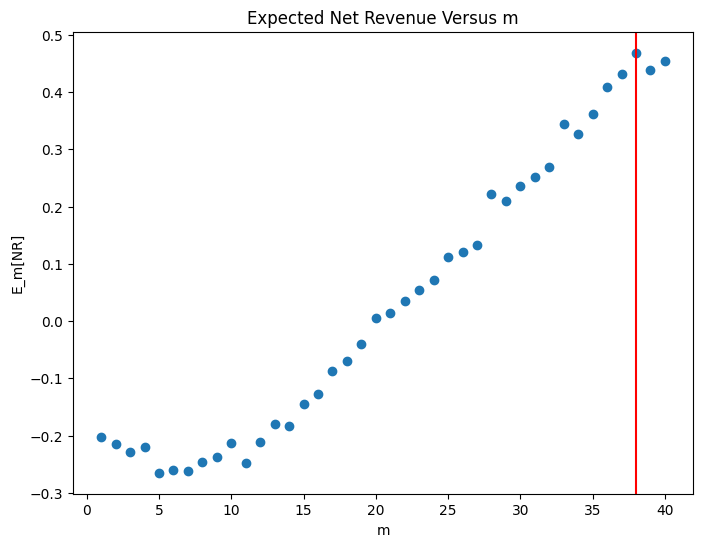

In [ ]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), E_mNR)
plt.axvline(x = m_max, c='red')
plt.xlabel(r'$m$')
plt.ylabel(r'$E_m[NR]$')
plt.title(r'Expected Net Revenue Versus $m$')
plt.show()